In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# for Google Colaboratory
# from google.colab import drive
# drive.mount('/content/gdrive')

all_files = ['sutrykjacek.csv', 'gotracz.csv', 'katarzynaobara.csv', 'michalakjerzy.csv', 'rozeckapl.csv', 'martalempart.csv']

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# all_files = []
# for file in os.listdir("./twitter_data"):
#     if file.endswith(".csv"):
#         all_files.append(os.path.join("./twitter_data", file))

all_tweets_df = pd.concat((pd.read_csv(f) for f in all_files)).sort_values(by=['username', 'date'])
print(all_tweets_df[['username']].nunique())
all_tweets_df.sample(20)
all_tweets_df[['date']]


Saving gotracz.csv to gotracz (1).csv
Saving katarzynaobara.csv to katarzynaobara (1).csv
Saving martalempart.csv to martalempart (1).csv
Saving michalakjerzy.csv to michalakjerzy (1).csv
Saving rozeckapl.csv to rozeckapl (1).csv
Saving sutrykjacek.csv to sutrykjacek (1).csv
User uploaded file "gotracz.csv" with length 65312 bytes
User uploaded file "katarzynaobara.csv" with length 19199 bytes
User uploaded file "martalempart.csv" with length 342657 bytes
User uploaded file "michalakjerzy.csv" with length 181705 bytes
User uploaded file "rozeckapl.csv" with length 46899 bytes
User uploaded file "sutrykjacek.csv" with length 170242 bytes
username    6
dtype: int64


,date
175,2018-01-04
172,2018-01-05
173,2018-01-05
174,2018-01-05
170,2018-01-07
171,2018-01-07
168,2018-01-09
169,2018-01-09
166,2018-01-10
167,2018-01-10


['GoTracz' 'KatarzynaObara' 'MichalakJerzy' 'RozeckaPL' 'SutrykJacek'
 'martalempart']


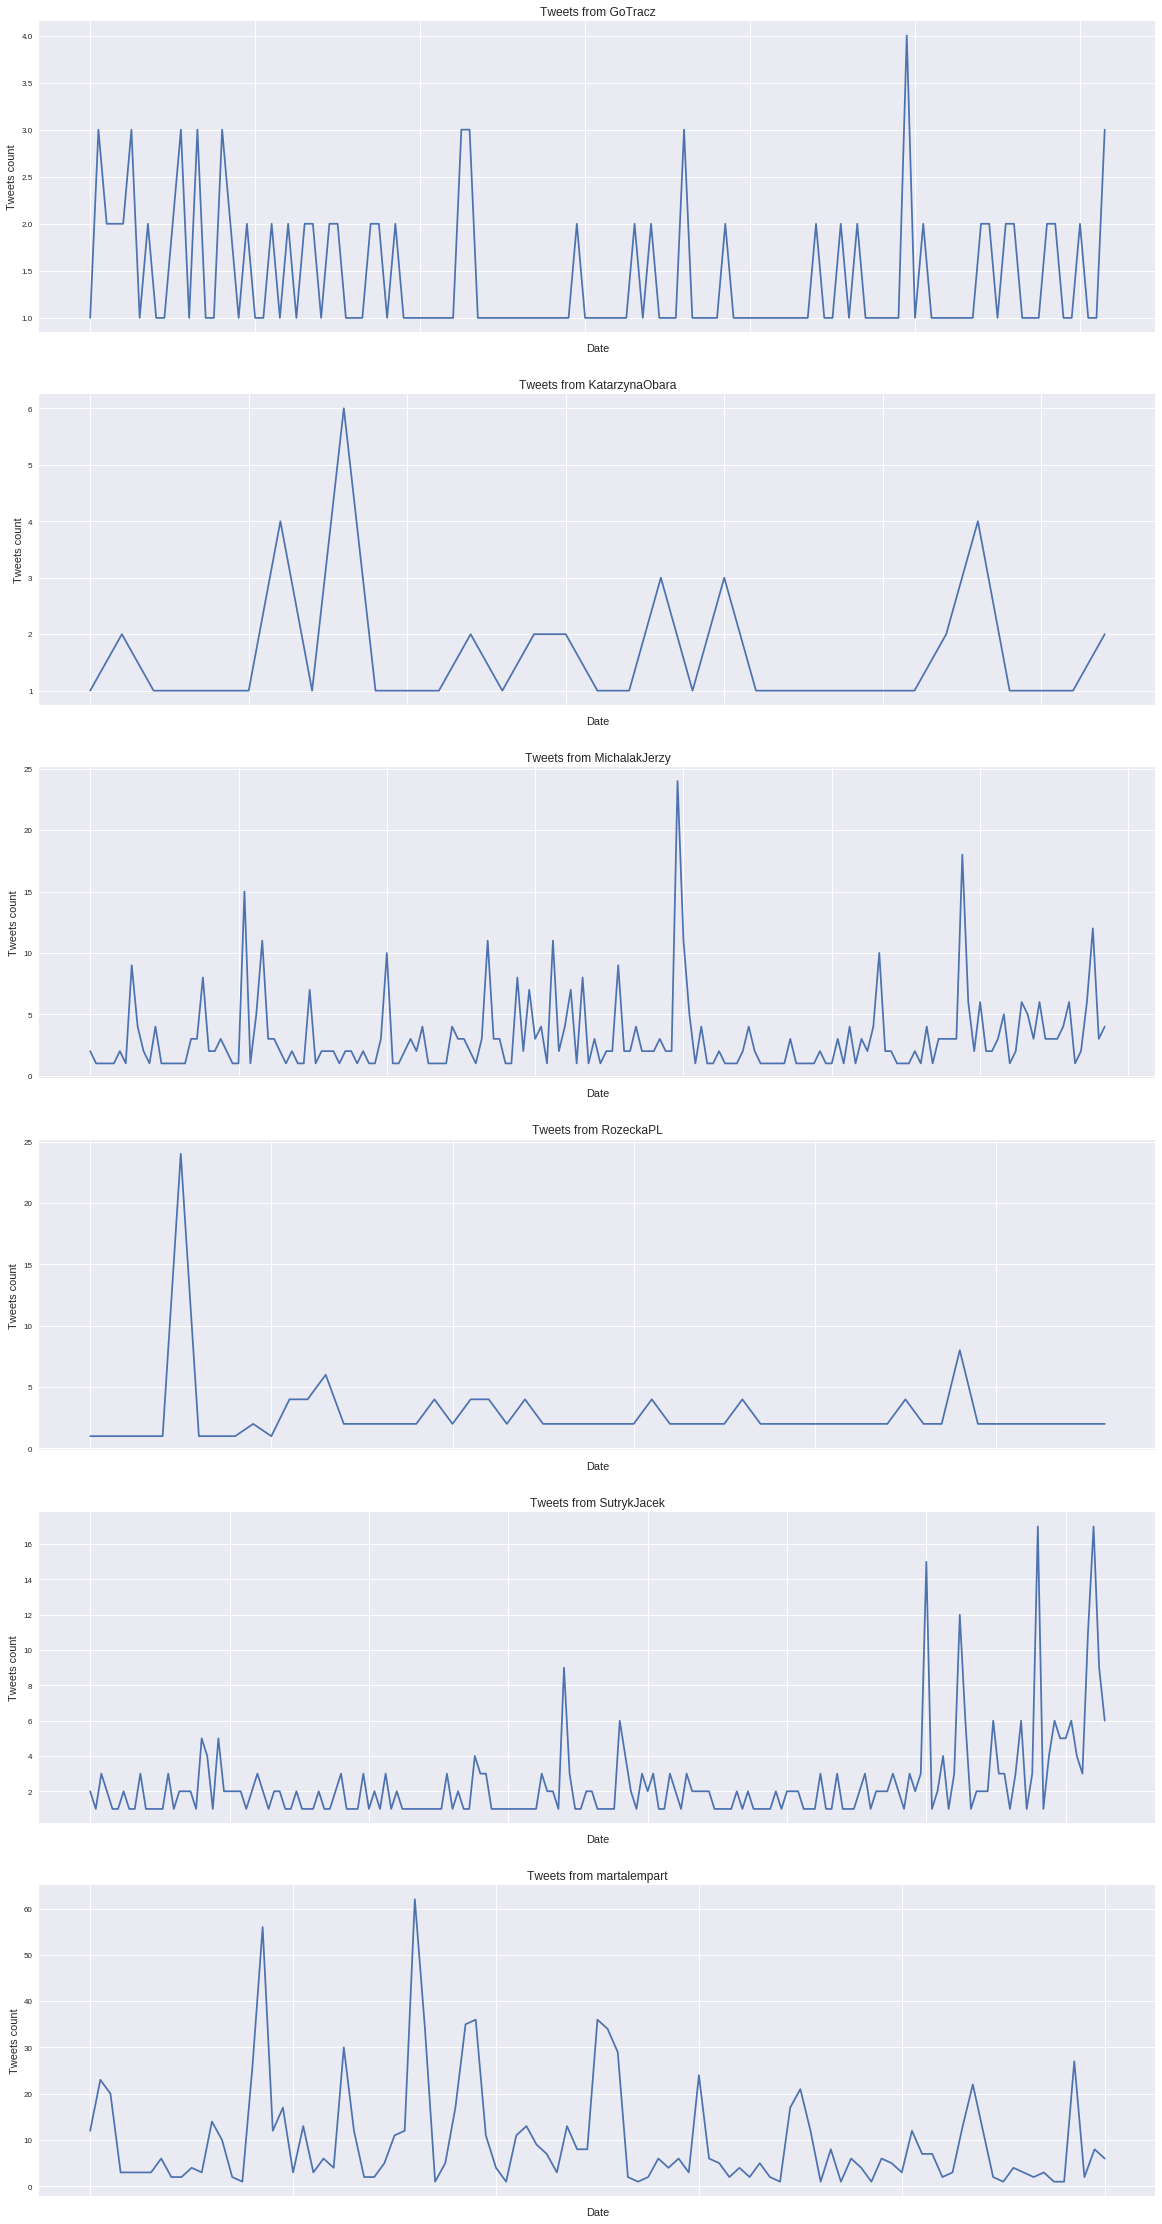

In [6]:
candidates_data_df = all_tweets_df[['date', 'time', 'username', 'tweet', 'likes', 'retweets', 'replies']]
candidates_count = candidates_data_df['username'].nunique()
candidates_usernames = candidates_data_df['username'].unique()
print(candidates_usernames)

fig, axes = plt.subplots(nrows=candidates_count, ncols=1, figsize=(20, 40))
summary_plot_data = []

for i in range(candidates_count):
    candidate_data_df = candidates_data_df[candidates_data_df['username'].str.contains(candidates_usernames[i])]
    candidate_tweets = candidate_data_df.groupby('date').count()
    
    plot_data = candidate_data_df[['date', 'username']].set_index('date').groupby('date').count()
    plot_data.name = candidates_usernames[i]
    ax = plot_data.plot(title="Tweets from " + plot_data.name, ax=axes[i], rot=90, fontsize=8, legend=False,
                        use_index=True)
    
    summary_plot_data.append(plot_data)
    ax.set(xlabel="Date", ylabel="Tweets count")

    candidate_tweets.reset_index(inplace=True)


            likes  retweets
date                       
2018-01-04      7         4
2018-01-05     21         9
2018-01-07    108        21
2018-01-09     38         7
2018-01-10     49        19
            likes  retweets
date                       
2018-05-17      1         0
2018-06-05      5         0
2018-06-11      2         0
2018-06-26      2         0
2018-06-29      2         0
            likes  retweets
date                       
2018-01-04     25         0
2018-01-08      9         0
2018-01-09     11         0
2018-01-10     39         7
2018-01-11      2         0
            likes  retweets
date                       
2018-01-24      6         8
2018-01-30      1         0
2018-02-06      5         6
2018-03-13      2         1
2018-04-04      6         4
            likes  retweets
date                       
2018-01-02     25         1
2018-01-03      7         0
2018-01-05     32         1
2018-01-06    120        23
2018-01-07      4         0
            likes  r

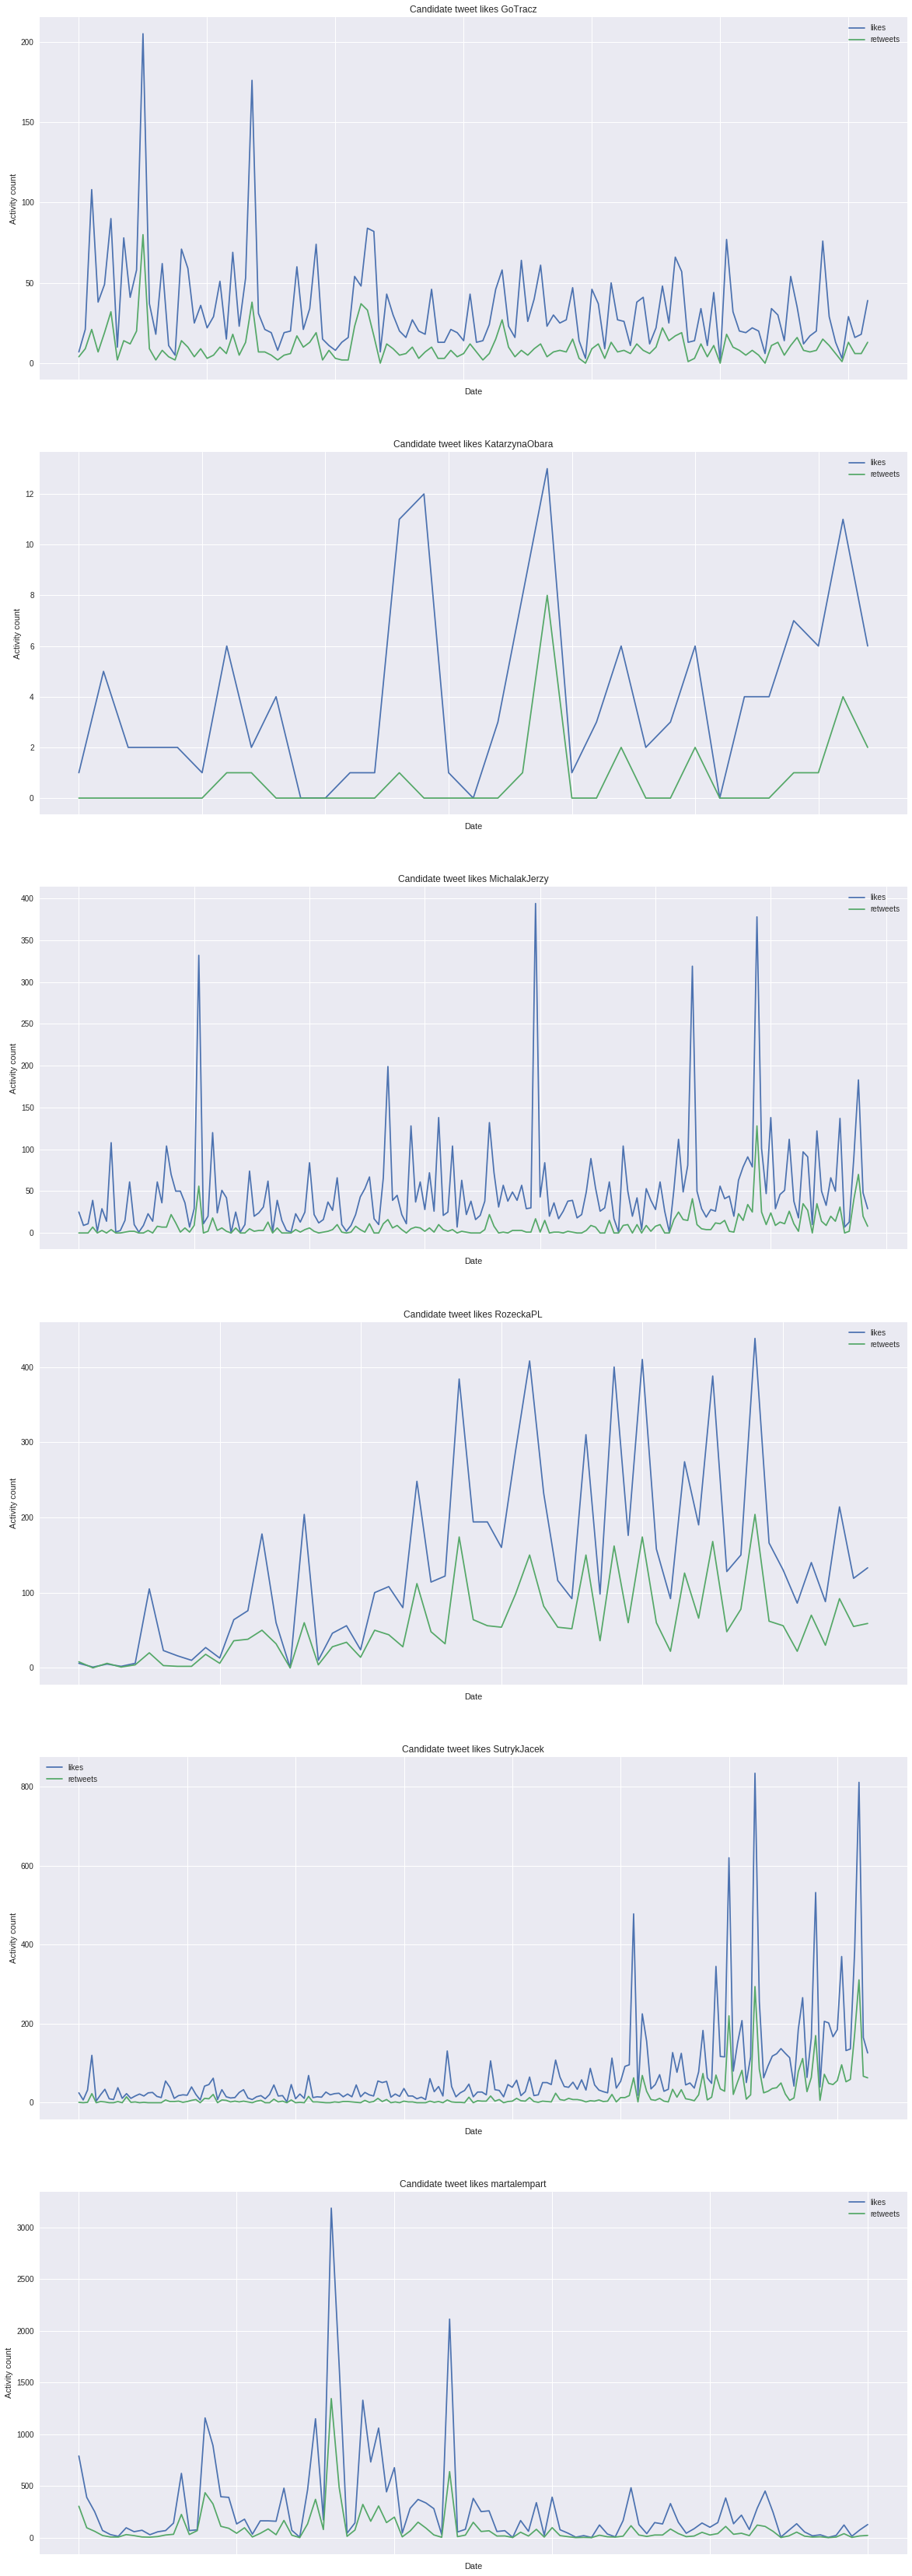

In [7]:
fig, axes = plt.subplots(nrows=candidates_count, ncols=1, figsize=(20, 60))

for i in range(candidates_count):
    candidate_data_df = candidates_data_df[candidates_data_df['username'].str.contains(candidates_usernames[i])]

    tweets_popularity_df = candidate_data_df.pivot_table(index='date', values=['retweets', 'likes'], aggfunc=np.sum)
    print(tweets_popularity_df.head())
    tweets_popularity_df.reset_index(inplace=True)

    plot_data = tweets_popularity_df[['date', 'likes', 'retweets']].set_index('date')
    ax = plot_data.plot(title='Candidate tweet likes ' + candidates_usernames[i], ax=axes[i])
    ax.set(xlabel="Date", ylabel="Activity count")


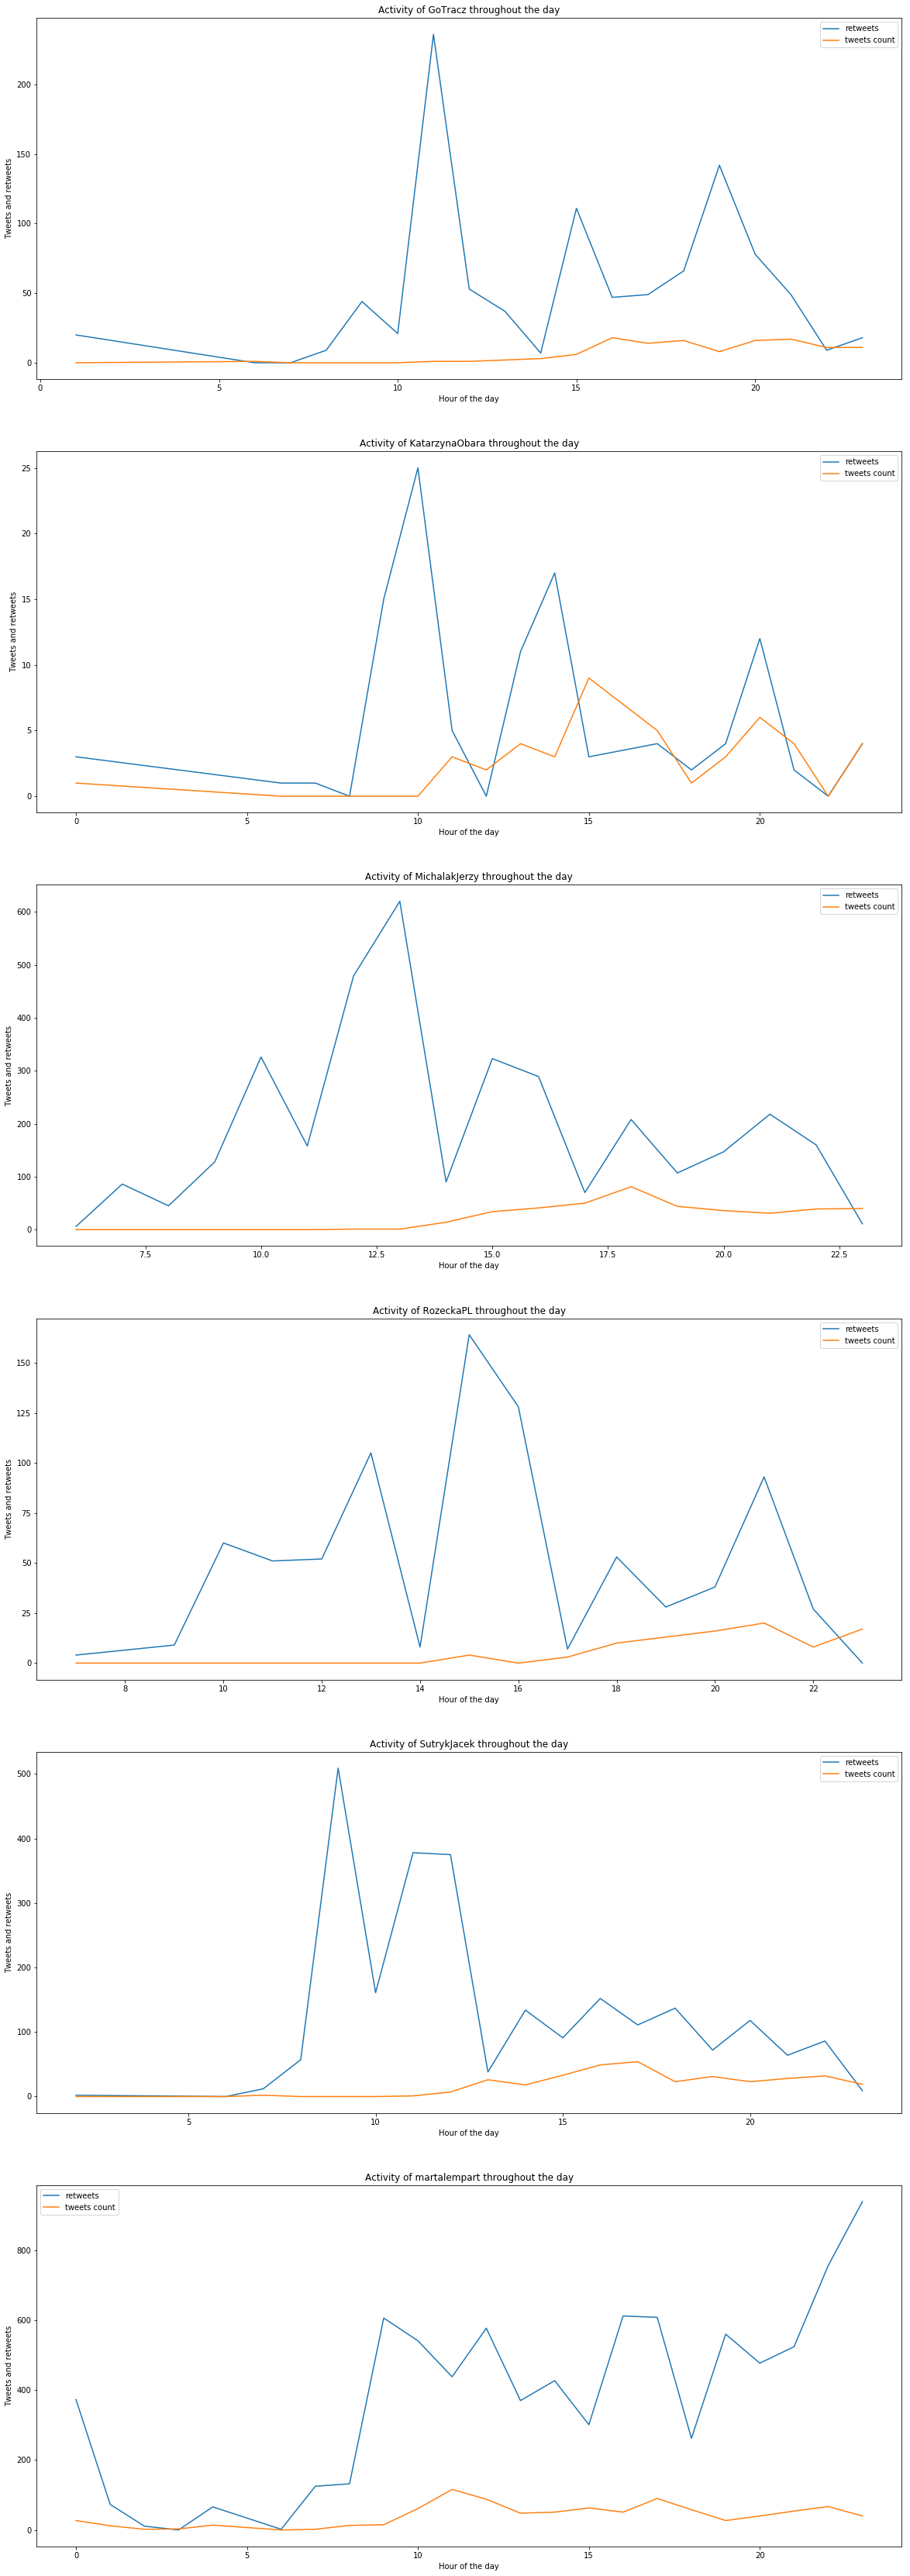

In [0]:
fig, axes = plt.subplots(nrows=candidates_count, ncols=1, figsize=(20, 60))

for i in range(candidates_count):
    candidate_data = candidates_data_df[candidates_data_df['username'].str.contains(candidates_usernames[i])]

    hours_df = candidate_data[['time']].applymap(lambda x: int(x.split(':')[0]))
    hours_count = hours_df['time'].value_counts().sort_index()
    hours_count.name = 'count of tweets'

    activity_df = candidate_data.copy()
    activity_df['hour'] = pd.to_datetime(candidate_data['time'], format='%H:%M:%S').dt.hour

    activity_day_df = activity_df.pivot_table(index=['hour'], values=['retweets'], aggfunc=sum)
    activity_day_df.reset_index(inplace=True)
    activity_day_df['tweets count'] = hours_count
    activity_day_df = activity_day_df.fillna(0)

    plot_data = activity_day_df[['hour', 'retweets', 'tweets count']].set_index('hour')
    ax = plot_data.plot(title='Activity of ' + candidates_usernames[i] + ' throughout the day', legend=True, ax=axes[i])
    ax.set(xlabel="Hour of the day", ylabel="Tweets and retweets")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


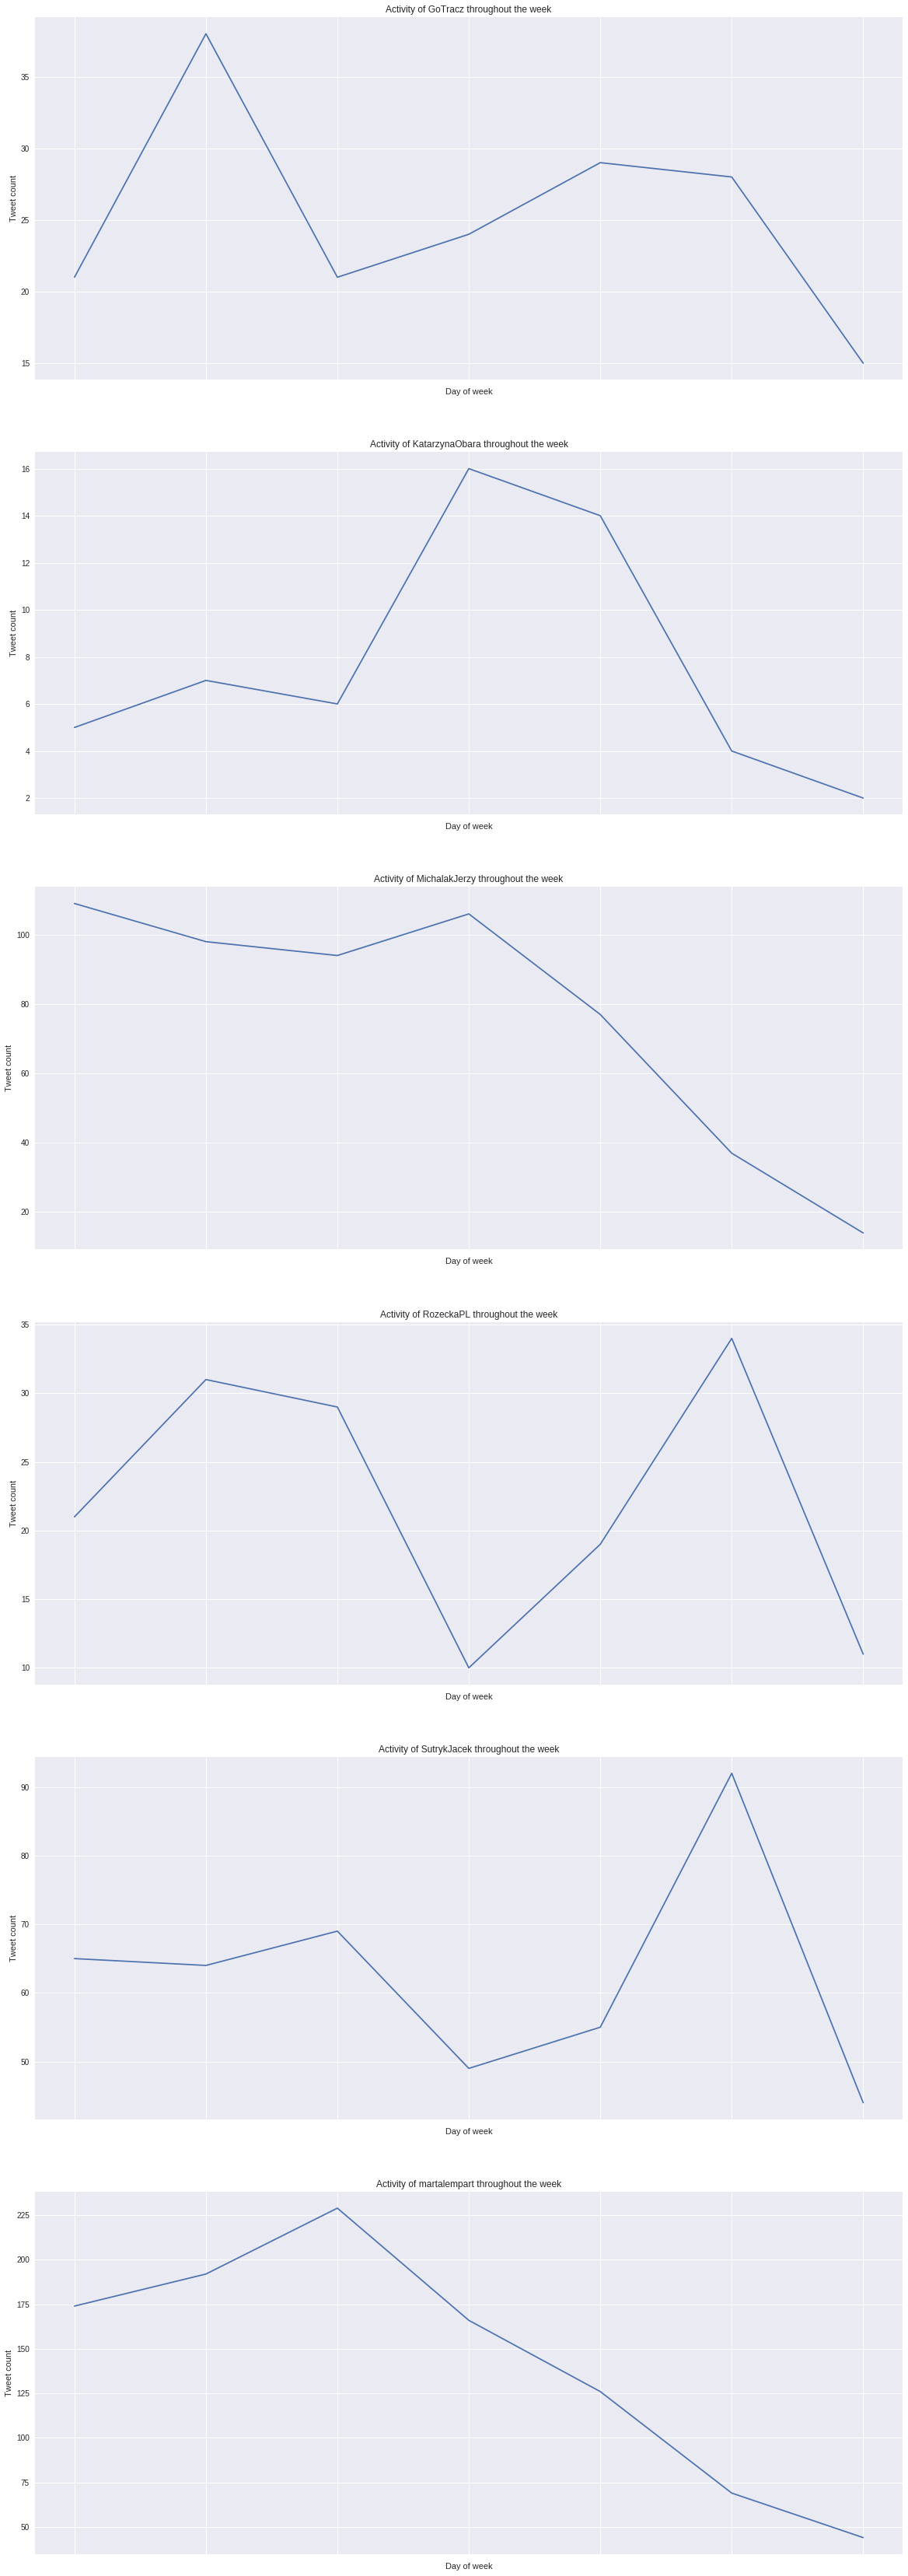

In [8]:
fig, axes = plt.subplots(nrows=candidates_count, ncols=1, figsize=(20, 60))

for i in range(candidates_count):
    candidate_data = candidates_data_df[candidates_data_df['username'].str.contains(candidates_usernames[i])]

    candidate_data['date'] = pd.to_datetime(candidate_data['date'])
    candidate_data['day_of_week'] = candidate_data['date'].dt.weekday_name
    activity_week_df = candidate_data.groupby('day_of_week').count()
    activity_week_df.reset_index(inplace=True)

    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    mapping = {day: i for i, day in enumerate(day_names)}
    sort_key = activity_week_df['day_of_week'].map(mapping)
    activity_week_df = activity_week_df.iloc[sort_key.argsort()].set_index('day_of_week')
    activity_week_df.reset_index(inplace=True)

    plot_data = activity_week_df[['day_of_week', 'username']].set_index('day_of_week')
    ax = plot_data.plot(title='Activity of ' + candidates_usernames[i] + ' throughout the week', legend=False,
                        ax=axes[i])
    ax.set(xlabel="Day of week", ylabel="Tweet count")


In [0]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

for i in range(candidates_count):
    candidate_data = candidates_data_df[candidates_data_df['username'].str.contains(candidates_usernames[i])]
    print(candidate_data['tweet'].loc[0])



    100% |████████████████████████████████| 133kB 3.9MB/s 
Nie chcę, by Wrocław był europejski z nazwy, tylko z działań. Chcę, żeby działaniami Wrocław zasłużył na tytuł Zielonej Stolicy Europy! 💚🤗W poniedziałek zacznie się nowy rozdział w historii Wrocławia, a ja bym chciała, żeby ten rozdział się zaczął z nowymi ludźmi #debataWrocław pic.twitter.com/imXJzWHyQc
@RozeckaPL @MichalakJerzy @WrocPopuli Dodam tylko, że wspomniana droga jest drogą wewnętrzną. Film na zlecenie dewelopera, który jednocześnie jest współwłaścicielem tv i autorem donosów na mnie wszystkich możliwych służb, ostatnio straży pożarnej. Ale nie zastraszycie mnie stekiem bzdur i manipulacji. Nie boje się !
@Przemek_Filar @p_romanowski Poza kampanią też będziemy intensywnie rozmawiać z ludźmi!
Zapraszam do mojego pomysłu na wspólne miasto Wrocław!#rozecka2018 #wyborysamorzadowe2018 #DotrzymujemySłowa pic.twitter.com/2pccXtMZL5
Podwórko Nivea przy ul. Muzealnej uroczyście otwarte! 👏🏻To piękne miejsce powstało z inicjaty

[polyglot_data] Downloading package sentiment2.pl to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package sentiment2.pl is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


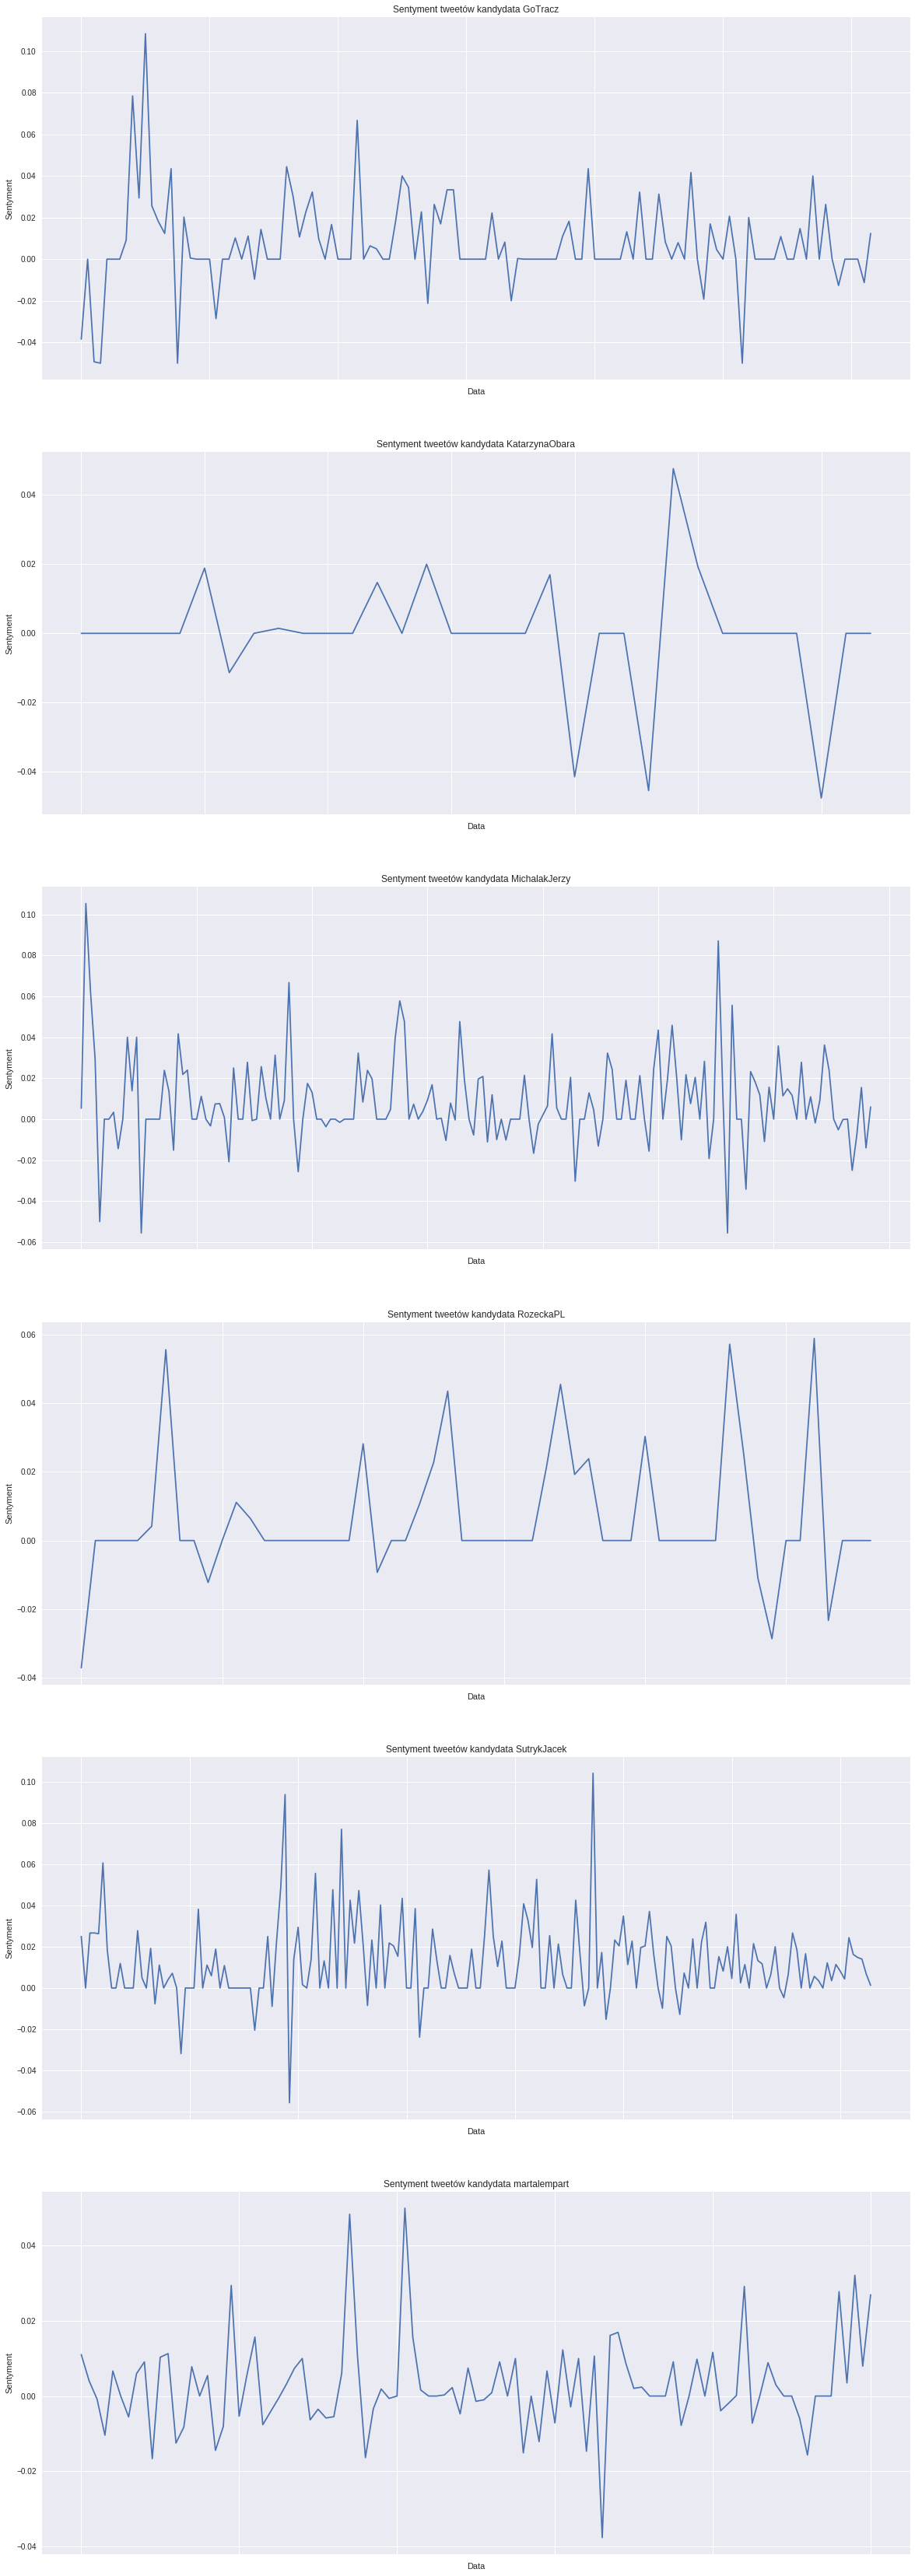

In [14]:
!pip install polyglot
!pip install pyicu
!pip install pycld2
!pip install morfessor
!polyglot download sentiment2.pl

import polyglot
from polyglot.text import Text as T
from polyglot.downloader import downloader

def get_polarity(txt):
    text = T(txt)
    text.hint_language_code = 'pl'
    j = 0
    avg = 0
    for w in text.words:
        j += 1
        avg += w.polarity

    return avg / j


fig, axes = plt.subplots(nrows=candidates_count, ncols=1, figsize=(20, 60))

for i in range(candidates_count):
    candidate_data = candidates_data_df[candidates_data_df['username'].str.contains(candidates_usernames[i])]
    
    candidate_sentiment = candidate_data[['date']]
    candidate_sentiment['Polarity'] = 0.0
    for j in candidate_sentiment.index:
        candidate_sentiment.at[j, 'Polarity'] = get_polarity(candidate_data.at[j, 'tweet'])
    
    candidate_sentiment = candidate_sentiment.groupby('date').mean()
    candidate_sentiment.reset_index(inplace=True)
    
    ax1 = candidate_sentiment[['date','Polarity']].set_index('date').plot(ax=axes[i], title='Sentyment tweetów kandydata '+candidates_usernames[i], legend=False)
    ax1.set(xlabel="Data", ylabel="Sentyment")